## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [3]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [4]:
# Check missing values and drop entries with missing values
print('Total rows/entries of the original dataset: {}\n'.format(len(original_data)))
original_data.dropna(axis=0, how='any', inplace=True)
print('Total rows/entries after missing value dropping: {}'.format(len(original_data)))

Total rows/entries of the original dataset: 79672

Total rows/entries after missing value dropping: 79661


In [5]:
original_data.head(5)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [6]:
# Define a new column to determine whether the outcome is adopted(1) or not(0), as the label
data = original_data.copy()
data['adoption'] = data.outcome_type.apply(lambda outcome: 1 if outcome=='Adoption' else 0)

# Drop the original outcome_type column
data.drop(columns=['outcome_type'], inplace=True)

data.head()

,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adoption
0,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194,0
1,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722,0
2,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889,0
3,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139,0
4,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444,0


In [7]:
# Split the data by 80%-20% (Train-Test)
data_tr, data_te = train_test_split(data, test_size=0.2)
print('Length of training set: {}'.format(len(data_tr)))
print('Length of test set: {}'.format(len(data_te)))


Length of training set: 63728
Length of test set: 15933


In [8]:
# Transfer categorical feature columns into multiple one-hot encoding columns
feature_categorical = ['sex_upon_outcome', 'animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake']
data_tr_expand = pd.get_dummies(data_tr, columns=feature_categorical)
data_te_expand = pd.get_dummies(data_te, columns=feature_categorical)

print('Number of features after expansion: {}'.format(len(data_tr_expand.columns)))
print('Number of features after expansion: {}'.format(len(data_te_expand.columns)))

Number of features after expansion: 33
Number of features after expansion: 33


In [9]:
# Excluding the label column (adoption) from the features
label_train = data_tr_expand['adoption']
label_test = data_te_expand['adoption']

feature_train = data_tr_expand.drop(columns=['adoption'])
feature_test = data_te_expand.drop(columns=['adoption'])

feature_train.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
32169,7.000000,7.000000,2015,2.0,2.809722,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1868,3.000000,3.000000,2014,1.0,20.838194,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
64552,0.164384,0.164384,2017,1.0,5.308333,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
68048,0.164384,0.082192,2017,1.0,27.094444,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
5673,7.000000,7.000000,2013,1.0,15.025000,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# Normalize both feature sets by each column's mean and std
mean_tr = feature_train.mean()
mean_te = feature_test.mean()
std_tr = feature_train.std()
std_te = feature_test.std()

feature_train_norm = (feature_train - mean_tr) / std_tr
feature_test_norm = (feature_test - mean_te) / std_te

feature_train_norm.head(10)

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
32169,1.672852,1.688591,-0.338777,1.922531,-0.335009,-0.364803,-0.373065,1.350896,-0.688440,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,-0.652756,-0.681813,2.301419,-0.403840,-0.304452
1868,0.295502,0.308018,-1.106680,-0.277369,0.101022,-0.364803,-0.373065,-0.740238,1.452537,-0.304452,...,-0.055968,2.070885,-0.258162,-1.534988,-0.212644,-0.652756,-0.681813,-0.434508,2.476188,-0.304452
64552,-0.680907,-0.670676,1.197028,-0.277369,-0.274579,-0.364803,-0.373065,1.350896,-0.688440,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,-0.652756,1.466654,-0.434508,-0.403840,-0.304452
68048,-0.680907,-0.699044,1.197028,-0.277369,0.252334,-0.364803,-0.373065,1.350896,-0.688440,-0.304452,...,-0.055968,2.070885,-0.258162,-1.534988,-0.212644,-0.652756,1.466654,-0.434508,-0.403840,-0.304452
5673,1.672852,1.688591,-1.874583,-0.277369,-0.039574,-0.364803,-0.373065,-0.740238,1.452537,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,-0.652756,-0.681813,-0.434508,2.476188,-0.304452
24632,-0.511097,-0.500468,-1.106680,-0.277369,0.083504,-0.364803,-0.373065,-0.740238,1.452537,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,1.531942,-0.681813,-0.434508,-0.403840,-0.304452
55479,-0.048836,-0.037125,0.429126,4.122432,0.417687,-0.364803,-0.373065,1.350896,-0.688440,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,-0.652756,-0.681813,2.301419,-0.403840,-0.304452
23777,-0.048836,-0.037125,-1.106680,-0.277369,-0.386421,-0.364803,-0.373065,-0.740238,-0.688440,3.284542,...,-0.055968,-0.482878,-0.258162,-1.534988,4.702620,-0.652756,-0.681813,-0.434508,-0.403840,3.284542
11744,0.639839,0.653161,-1.106680,-0.277369,-0.381315,-0.364803,-0.373065,-0.740238,1.452537,-0.304452,...,-0.055968,-0.482878,3.873472,-1.534988,-0.212644,-0.652756,-0.681813,-0.434508,2.476188,-0.304452
15118,-0.709209,-0.694316,-1.106680,-0.277369,0.154029,-0.364803,-0.373065,-0.740238,1.452537,-0.304452,...,-0.055968,-0.482878,-0.258162,0.651461,-0.212644,1.531942,-0.681813,-0.434508,-0.403840,-0.304452


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [11]:
# Fit the logistic regression classifier
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(feature_train_norm, label_train)

LogisticRegression(max_iter=10000)

In [12]:
# Obtain the model prediction on the test set
predict_prob = model.predict_proba(feature_test_norm)
# print(predict_prob)

In [13]:
# Define functions to display the confusion matrix and calculate all required scores
# Calculate the confusion matrix
def confusion_matrix(pred_prob, true_label, threshold=0.5):
    pred_label = (pred_prob[:, 1] > threshold).astype(int)
    
    # calculate sum of entries for true positive(TP), true negative(TN), false positive(FP), and false negative(FN) respectively
    TP = np.sum(np.logical_and(pred_label == 1, true_label == 1))
    TN = np.sum(np.logical_and(pred_label == 0, true_label == 0))
    FP = np.sum(np.logical_and(pred_label == 1, true_label == 0))
    FN = np.sum(np.logical_and(pred_label == 0, true_label == 1))
    
    # return them in confusion matrix form
    conf_matrix = np.asarray([[TP, FP], [FN, TN]])
    
    return conf_matrix


# Plot the confusion matrix obtained above
def plot_matrix(conf_matrix):
    [[TP, FP], [FN, TN]] = conf_matrix.astype(float)
    matrix_df = pd.DataFrame(conf_matrix, index=['1', '0'], columns=['0', '1'])
    map_label = np.asarray([['TP: {}'.format(TP), 'FP: {}'.format(FP)], ['FN: {}'.format(FN), 'TN: {}'.format(TN)]])
    
    matrix_heatmap = sn.heatmap(matrix_df, annot=map_label, cmap="YlGnBu", cbar=False, fmt='')
    return matrix_heatmap


# Compute all scores: accuracy, precision, recall, and F1-score
def compute_scores(conf_matrix):
    [[TP, FP], [FN, TN]] = conf_matrix.astype(float)
    
    # compute scores
    accuracy = (TP + TN) / np.sum(conf_matrix)
    
    precision_positive = TP / (TP + FP) if (TP + FP) != 0 else np.nan 
    precision_negative = TN / (TN + FN) if (TN + FN) != 0 else np.nan
    
    recall_positive = TP / (TP + FN) if (TP + FN) != 0 else np.nan
    recall_negative = TN / (TN + FP) if (TN + FP) != 0 else np.nan
    
    f1_positive = 2 * (precision_positive * recall_positive) / (precision_positive + recall_positive) if (precision_positive + recall_positive) != 0 else np.nan 
    f1_negative = 2 * (precision_negative * recall_negative) / (precision_negative + recall_negative) if (precision_negative + recall_negative) != 0 else np.nan
    
    return [accuracy, precision_positive, precision_negative, recall_positive, recall_negative, f1_positive, f1_negative]

Text(0.5, 1.0, 'Confusion matrix given T=0.5')

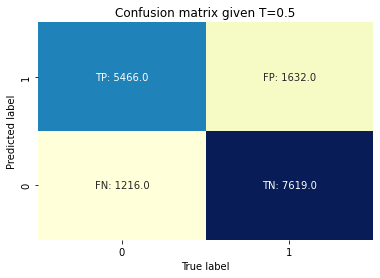

In [14]:
# Display the confusion matrix and show all scores
conf_matrix = confusion_matrix(predict_prob, label_test, threshold=0.5)
matrix_heatmap = plot_matrix(conf_matrix)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion matrix given T=0.5')

In [15]:
[accuracy, precision_positive, precision_negative, recall_positive, recall_negative, f1_positive, f1_negative] = compute_scores(conf_matrix)
print('Model accuracy: {:.3f}'.format(accuracy))
print('Positive case precision: {0:.3f}, recall: {1:.3f}, F1-score: {2:.3f}'.format(precision_positive, recall_positive, f1_positive))
print('Positive case precision: {0:.3f}, recall: {1:.3f}, F1-score: {2:.3f}'.format(precision_negative, recall_negative, f1_negative))

Model accuracy: 0.821
Positive case precision: 0.770, recall: 0.818, F1-score: 0.793
Positive case precision: 0.862, recall: 0.824, F1-score: 0.843


### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

In [16]:
# Densely discretize (sample) threshold value as a list in range [0, 1], with 100 uniform distance samples
t = np.linspace(0, 1, num=100)

In [17]:
parameters = ['Accuracy', 'Precision+', 'Precision-', 'Recall+', 'Recall-', 'F1+', 'F1-']

threshold_scores = pd.concat([pd.DataFrame([compute_scores(confusion_matrix(predict_prob, label_test, thre))], columns=parameters) 
                             for thre in t], ignore_index=True)
threshold_scores['Threshold'] = t

# Select threshold as the index to visualize the result
threshold_scores.set_index('Threshold', inplace=True)

threshold_scores.head(10)

,Accuracy,Precision+,Precision-,Recall+,Recall-,F1+,F1-
Threshold,,,,,,,
0.000000,0.419381,0.419381,NaN,1.000000,0.000000,0.590935,NaN
0.010101,0.496015,0.454168,0.997555,0.999551,0.132310,0.624556,0.233632
0.020202,0.524760,0.468741,0.994697,0.998653,0.182467,0.638015,0.308367
0.030303,0.538254,0.475898,0.990674,0.997306,0.206680,0.644332,0.342009
0.040404,0.557585,0.486585,0.988465,0.996109,0.240839,0.653799,0.387310
0.050505,0.592669,0.507328,0.987293,0.994612,0.302346,0.671924,0.462926
0.060606,0.625871,0.528778,0.982971,0.991320,0.361907,0.689677,0.529035
0.070707,0.659826,0.552918,0.977800,0.986681,0.423738,0.708696,0.591252
0.080808,0.685684,0.573152,0.972389,0.981443,0.472057,0.723681,0.635570


Text(0.5, 1.0, 'Accuracy')

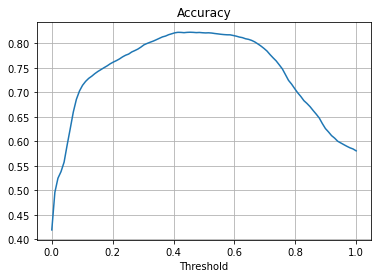

In [18]:
# Plot the accuracy diagram
threshold_scores['Accuracy'].plot(grid=True).set_title('Accuracy')

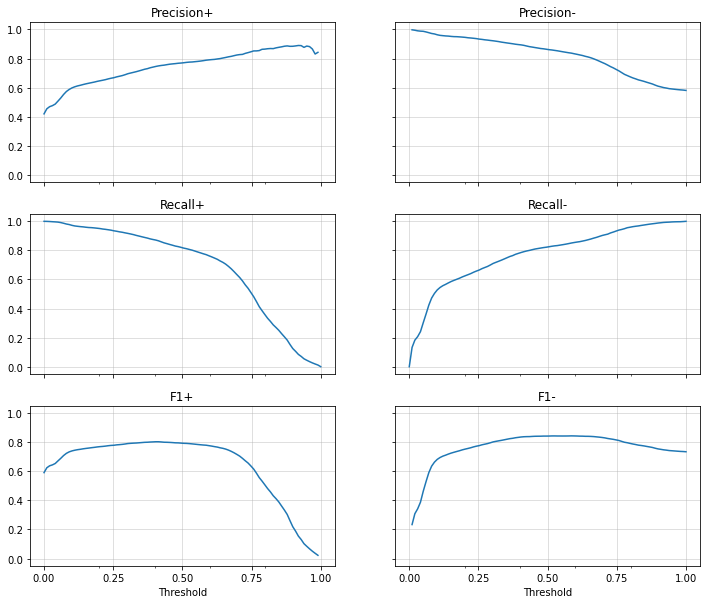

In [19]:
# Plot other paired score diagram
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12,10))

plot_scores = ['Precision+', 'Precision-', 'Recall+', 'Recall-', 'F1+', 'F1-']

ticks = np.linspace(0,1,5)

for ax, col in zip(axs.flat, plot_scores):
    threshold_scores[col].plot(ax=ax, grid=True)
    ax.set_title(col)
    ax.set_xticks(ticks)    
    ax.grid(which='major', alpha=0.5)

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [20]:
feature_w = []
for feature, w in zip(feature_train_norm.columns, model.coef_[0]):
    feature_w.append({"feature": feature, "weight": w})
    
features_weight = pd.DataFrame(feature_w).sort_values('weight')
features_weight.head(10)

,feature,weight
1,age_upon_intake_(years),-2.090669
6,sex_upon_outcome_Intact Male,-0.784598
5,sex_upon_outcome_Intact Female,-0.680841
26,intake_type_Wildlife,-0.664461
31,sex_upon_intake_Unknown,-0.498926
9,sex_upon_outcome_Unknown,-0.498926
24,intake_type_Public Assist,-0.356716
29,sex_upon_intake_Neutered Male,-0.292490
30,sex_upon_intake_Spayed Female,-0.225711
16,intake_condition_Injured,-0.068337


<BarContainer object of 32 artists>

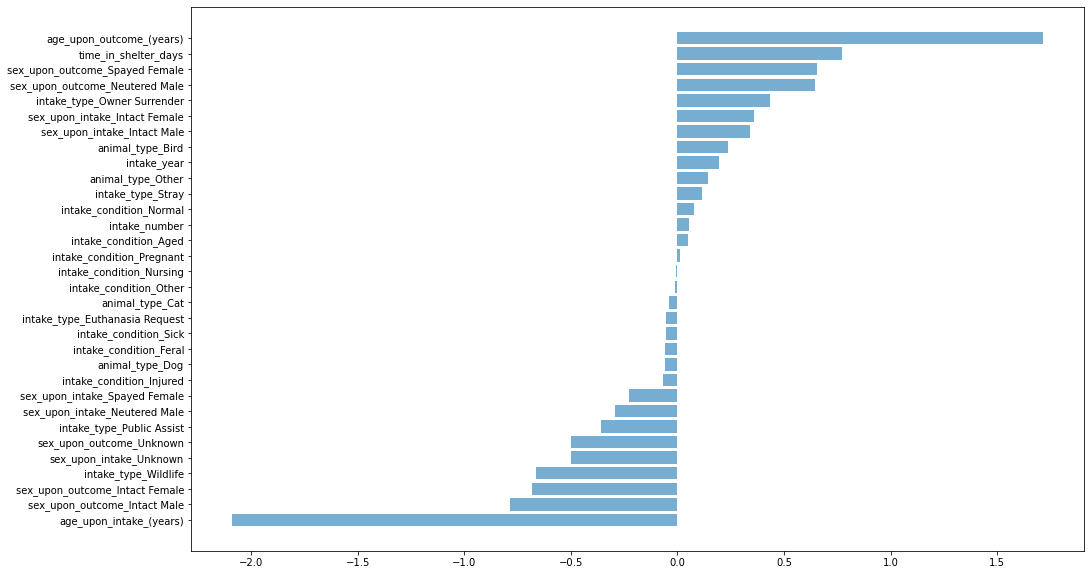

In [21]:
# Use a horizontal bar plot to visualilze their contribution
plt.figure(figsize=[16, 10])
plt.barh(features_weight.feature, features_weight.weight, alpha=0.6)


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

**Answer**: A

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

**Answer**: D